In [16]:
import pandas as pd
import matplotlib.pyplot as plt

''' Define Constant '''
# the number of total estimated ridership (2021)
total_ridership = 47866883

# the total number of crimes on metro rail (2010~2022)
total_crime_num = 8058

# year gap of the dataset
year_gap = 2022 - 2010 + 1

# the ratio of ridership by line
ratio_line = {
    "BLUE|METRO CENTER" : 0.19,
    "RED|METRO CENTER|UNION|PURPLE" : 0.45,
    "GREEN" : 0.09,
    "GOLD|UNION" : 0.1,
    "EXPO|METRO CENTER" : 0.17,
}

# the ratio of ridership by race
ratio_race = {
    "Hispanic" : 0.66,
    "Black" : 0.15,
    "White" : 0.08,
    "Asian" : 0.06,
    "Islander" : 0.01,
    "Native" : 0.01,
    "Other" : 0.04,
}

ratio_sex = {
    "M" : 0.46,
    "F" : 0.53
}

# the ratio of ridership per hour
ratio_time = [
    0.0047, 0.0024, 0.0009, 0, 0.0009, 0.019, 0.0569, 0.0853,
    0.0948, 0.0569, 0.0427, 0.0427, 0.0474, 0.0522, 0.0569, 0.0759, 
    0.1043, 0.109, 0.0522, 0.0285, 0.0237, 0.019, 0.0142, 0.0095
]

''' Read CSV file '''
crime = pd.read_csv('./metro_rail_crimes_predict.csv')


''' Input information of time, line, race and sex '''
# Input boarding time
print("Enter your metro boarding time. (hr range: 0 ~ 23)")
print("ex) if you board 11am to 1pm, enter \"11-13\"")
time = input("input : ")

time = list(map(int, time.split('-')))

if time[0] < 0 or time[0] > 23 or time[1] < 0 or time[0] > 23:
    print("You entered an incorrect value.")
    exit()

print("Enter the line you want to board.")
print("1. Red, Purple")
print("2. Expo")
print("3. Blue")
print("4. Gold")
print("5. Green")
line = int(input("input : "))

if line == 1:
    line = "RED|METRO CENTER|UNION|PURPLE"
elif line == 2:
    line = "EXPO|METRO CENTER"
elif line == 3:
    line = "BLUE|METRO CENTER"
elif line == 4:
    line = "GOLD|UNION"
elif line == 5:
    line = "GREEN"
else:
    print("You entered an incorrect value.")
    exit()


print("\nEnter the race of the passenger.")
print("1. Asian (Chinese, Korean, Japanese, Filipino, Cambodian, Vietnamese, Laoian, Asian Indian and Other Asian)")
print("2. Black")
print("3. White")
print("4. Hispanic/Latin/Mexican")
print("5. Islander (Guamanian, Pacific Islander, Samoan, Hawaiian)")
print("6. American Indian/Alaskan Native")
print("7. Other")
race = int(input("input : "))


if race == 1:
    race = "Asian"
elif race == 2:
    race = "Black"
elif race == 3:
    race = "White"
elif race == 4:
    race = "Hispanic"
elif race == 5:
    race = "Islander"
elif race == 6:
    race = "Native"
elif race == 7:
    race = "Other"
else:
    print("You entered an incorrect value.")
    exit()


print("\nEnter the passenger's gender.")
print("1. Female\n2. Male")
gender = int(input("input : "))


if gender == 1:
    gender = "F"
elif gender == 2:
    gender = "M"
else:
    print("You entered an incorrect value.")
    exit()


''' Predict the probability of a crime '''

# Expands boarding time by one hour 
# for comprehensive and fluid crime probability calculations
time_arr = []
start = time[0]
end = time[1]

if start == end:
    if start + 1 < 23:
        time_arr = [start-1, start, start+1]
    else:
        time_arr = [start-1, start, start+1-24]
elif start < end:
    for i in range(start-1, end+2):
        if i < 0:
            time_arr.append(24+i)
        elif i > 23:
            time_arr.append(i-24)
        else:
            time_arr.append(i)
else:
    for i in range(start-1, end+24+2):
        if i < 0:
            time_arr.append(24+i)
        elif i > 23:
            time_arr.append(i-24)
        else:
            time_arr.append(i)


# Total ridership ratio by time_arr
ratio_total_time = 0
# print(time_arr)
for t in time_arr:
    ratio_total_time += ratio_time[t]

# Find the number of crimes
cr = crime.copy()
cr = cr[cr['Premis Desc'].str.contains(line)]
cr = cr[cr["Race"] == race]
cr = cr[cr["Hour"].isin(time_arr)]
cr = cr[cr["Vict Sex"] == gender]

crime_count = cr["DR_NO"].count()

# Carculate the probability
ratio_crime = (crime_count / year_gap) / total_ridership
result = ratio_crime / (ratio_total_time * ratio_line[line] * ratio_race[race] * ratio_sex[gender])


if line == "RED|METRO CENTER|UNION|PURPLE":
    line = "RED|PURPLE"
elif line == "EXPO|METRO CENTER":
    line = "EXPO"
elif line == "BLUE|METRO CENTER":
    line = "BLUE"
elif line == "GOLD|UNION":
    line = "GOLD"

if gender == "F":
    gender = "female"
elif gender == "M":
    gender = "male"
    
''' Output '''
print("\n-----------PREDICT RESULT-----------")
print("You're a %s %s and riding %s line at %s:00-%s:00"%(race, gender, line, time[0], time[1]) )
print("the probability of a crime : {:.4f} ‱".format(result * 10000))

print("If a crime occurs, it may be :", end=" ")
crm_cd_avg = cr["Crm Cd"].mean()
print(crm_cd_avg)
if crm_cd_avg < 110+170:
    print("a very violent crime")
elif 110+170 <= crm_cd_avg < 110+170*2:
    print("a violent crime")
elif 110+170*2 <= crm_cd_avg < 110+170*3:
    print("a misdemeanor")
else:
    print("a minor offense")
    
top = cr[["Crm Cd"]].sort_values('Crm Cd').head(3)
for i in range(3):
    top3.append(top.iloc[i,0])
    
crm_cd = {
    110 : "CRIMINAL HOMICIDE",
    113 : "MANSLAUGHTER, NEGLIGENT",
    121 : "RAPE, FORCIBLE",
    122 : "RAPE, ATTEMPTED",
    210 : "ROBBERY",
    220 : "ATTEMPTED ROBBERY",
    230 : "ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",
    231 : "ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER",
    236 : "INTIMATE PARTNER - AGGRAVATED ASSAULT",
    237 : "CHILD NEGLECT (SEE 300 W.I.C.)",
    250 : "SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",
    310 : "BURGLARY",
    330 : "BURGLARY FROM VEHICLE",
    331 : "THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)",
    341 : "THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",
    350 : "THEFT, PERSON",
    351 : "PURSE SNATCHING",
    352 : "PICKPOCKET",
    353 : "DRUNK ROLL",
    354 : "THEFT OF IDENTITY",
    410: "BURGLARY FROM VEHICLE, ATTEMPTED",
    420 : "THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)",
    433 : "DRIVING WITHOUT OWNER CONSENT",
    434 : "FALSE IMPRISONMENT",
    437 : "RESISTING ARREST",
    440 : "THEFT PLAIN - PETTY ($950 & UNDER)"    
}    
    
    
print("\nThe worst three cases was:")
print("1. %s"%(crm_cd[top3[0]]) ) 
print("2. %s"%(crm_cd[top3[1]]) )
print("3. %s"%(crm_cd[top3[2]]) )

Enter your metro boarding time. (hr range: 0 ~ 23)
ex) if you board 11am to 1pm, enter "11-13"
Enter the line you want to board.
1. Red, Purple
2. Expo
3. Blue
4. Gold
5. Green

Enter the race of the passenger.
1. Asian (Chinese, Korean, Japanese, Filipino, Cambodian, Vietnamese, Laoian, Asian Indian and Other Asian)
2. Black
3. White
4. Hispanic/Latin/Mexican
5. Islander (Guamanian, Pacific Islander, Samoan, Hawaiian)
6. American Indian/Alaskan Native
7. Other

Enter the passenger's gender.
1. Female
2. Male

-----------PREDICT RESULT-----------
You're a Asian female and riding RED|PURPLE line at 12:00-13:00
the probability of a crime : 0.1015 ‱
If a crime occurs, it may be : 485.44444444444446
a misdemeanor

The worst three cases was:
1. ATTEMPTED ROBBERY
2. ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
3. THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD


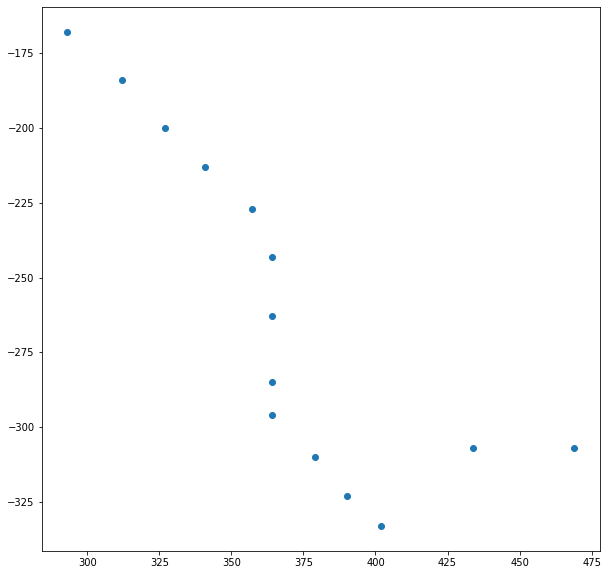

In [23]:
#metro red line
red = {
    "north hollywood" : [100, 293, -168],
    "universal city/studio city" : [101, 312, -184],
    "hollywood/highland" : [102, 327, -200],
    "hollywood/vine" : [103, 341, -213],
    "hollywood/western" : [104, 357, -227],
    "vermont/sunset" : [105, 364, -243],
    "vermont/santa monica" : [106, 364, -263],
    "vermont/beverly" : [107, 364, -285],
    "wilshire/vermont" : [108, 364, -296],
    "westlake/macarthur park" : [109, 379, -310],
    "7th st/metro center" : [110, 390, -323],
    "pershing square" : [111, 402, -333],
    "civic ctr/grand park" : [112, 434, -307],
    "union station" : [113, 469, -307]
}

posX_red=[]
posY_red=[]
for i, name in enumerate(red):
    posX_red.append(red[name][1])
    posY_red.append(red[name][2])

plt.figure(figsize=(10,10))
plt.scatter(posX_red, posY_red)
plt.show()

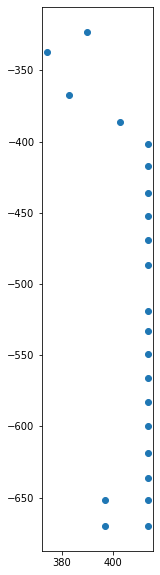

In [36]:
#metro blue line
blue = {
    "7th st/metro center" : [200, 390, -323],
    "pico" : [201, 374, -337],
    "grand/lattc" : [202, 383, -367],
    "san pedro st" : [203, 403, -386],
    "washington" : [204, 414, -402],
    "vernon" : [205, 414, -417],
    "slauson" : [206, 414, -436],
    "florence" : [207, 414, -452],
    "firestone" : [208, 414, -469],
    "103rd st/watts towers" : [209, 414, -487],
    "willowbrook/rosa parks" : [210, 414, -519],
    "compton" : [211, 414, -533],
    "artesia" : [212, 414, -549],
    "del amo" : [213, 414, -566],
    "wardlow" : [214, 414, -583],
    "willow st" : [215, 414, -600],
    "pacific coast hwy" : [216, 414, -619],
    "anaheim st" : [217, 414, -636],
    "5th st" : [218, 414, -652],
    "1st st" : [219, 414, -670],
    "downtown long beach" : [220, 397, -670],
    "pacific av" : [221, 397, -652],
    "anaheim st" : [217, 414, -636]
}

posX_blue=[]
posY_blue=[]
for i, name in enumerate(blue):
    posX_blue.append(blue[name][1])
    posY_blue.append(blue[name][2])

plt.figure(figsize=(2,10))
plt.scatter(posX_blue, posY_blue)
plt.show()

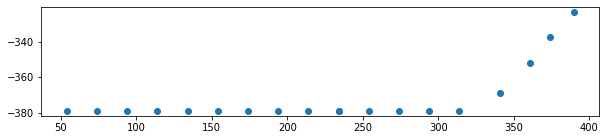

In [41]:
#metro Expo line
expo = {
    "7th St/Metro Center" : [300, 390, -323],
    "Pico" : [301, 374, -337],
    "LATTC/Ortho Institute" : [302, 361, -352],
    "Jefferson/USC" : [303, 341, -369],
    "Expo Park/USC" : [304, 314, -379],
    "Expo/Vermont" : [305, 294, -379],
    "Expo/Western" : [306, 274, -379],
    "Expo/Crenshaw" : [307, 254, -379],
    "Farmdale" : [308, 234, -379],
    "Expo/La Brea" : [309, 234, -379],
    "La Cienega/Jefferson" : [310, 214, -379],
    "Culver City" : [311, 194, -379],
    "Palms" : [312, 174, -379],
    "Westwood/Rancho" : [313, 154, -379],
    "Expo/Sepulveda" : [314, 134, -379],
    "Expo/Bundy" : [315, 114, -379],
    "26th St/Bergamot" : [316, 94, -379],
    "17th St/SMC" : [317, 74, -379],
    "Downtown Santa Monica" : [318, 54, -379]
}

posX_expo=[]
posY_expo=[]
for i, name in enumerate(expo):
    posX_expo.append(expo[name][1])
    posY_expo.append(expo[name][2])

plt.figure(figsize=(10,2))
plt.scatter(posX_expo, posY_expo)
plt.show()

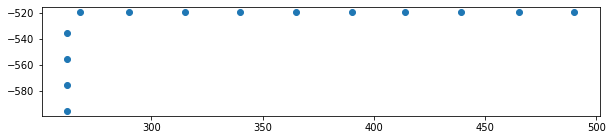

In [51]:
#metro Green line
green = {
    "Norwalk" : [400, 490, -519],
    "Lakewood Bl" : [401, 465, -519],
    "Long Beach Bl" : [402, 439, -519],
    "Willowbrook/Rosa Parks" : [403, 414, -519],###
    "Avalon" : [404, 390, -519],
    "Harbor Freeway" : [405, 365, -519],
    "Vermont/Athens" : [406, 340, -519],
    "Crenshaw" : [407, 315, -519],
    "Hawthorne/Lennox" : [408, 290, -519],
    "Aviation/LAX" : [409, 268, -519],
    "Mariposa" : [410, 262, -535],####
    "El Segundo" : [411, 262, -555],
    "Douglas" : [412, 262, -575],
    "Redondo Beach" : [413, 262, -595]
}

posX_green=[]
posY_green=[]
for i, name in enumerate(green):
    posX_green.append(green[name][1])
    posY_green.append(green[name][2])

plt.figure(figsize=(10,2))
plt.scatter(posX_green, posY_green)
plt.show()

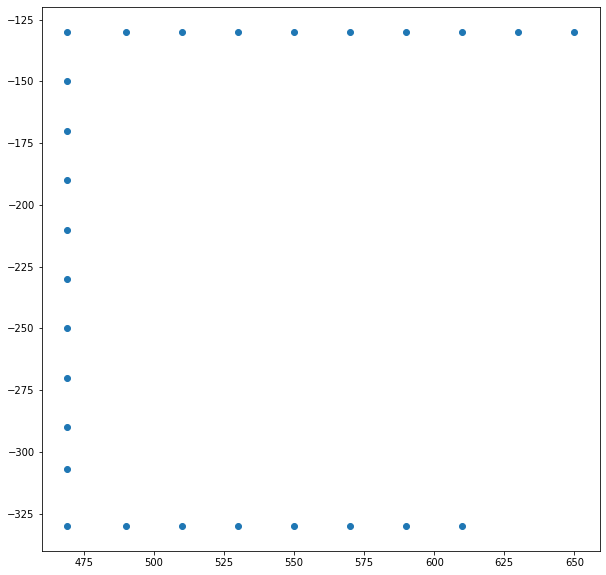

In [61]:
#metro Gold line
gold = {
    "APU/Citrus" : [500, 650, -130],
    "Azusa Downtown" : [501, 630, -130],
    "Irwindale" : [502, 610, -130],
    "Duarte/City of Hope" : [503, 590, -130],
    "Monrovia" : [504, 570, -130],
    "Arcadia" : [505, 550, -130],
    "Sierra Madre Villa" : [506, 530, -130],
    "Allen" : [507, 510, -130],
    "Lake Avenue" : [508, 490, -130],
    "Memorial Park" : [509, 469, -130],
    "Del Mar" : [510, 469, -150],
    "Fillmore" : [511, 469, -170],
    "South Pasadena" : [512, 469, -190],
    "Highland Park" : [513, 469, -210],
    "Southwest Museum" : [514, 469, -230],
    "Heritage Square" : [515, 469, -250],
    "Lincoln/Cypress" : [516, 469, -270],
    "Chinatown" : [517, 469, -290],
    "Union Station" : [518, 469, -307],###
    "Little Tokyo/Arts District" : [519, 469, -330],
    "Pico/Aliso" : [520, 490, -330],
    "Mariachi Plaza" : [521, 510, -330],
    "Soto" : [522, 530, -330],
    "Indiana" : [523, 550, -330],
    "Maravilla" : [524, 570, -330],
    "East LA Civic Center" : [525, 590, -330],
    "Atlantic" : [526, 610, -330]
}

posX_gold=[]
posY_gold=[]
for i, name in enumerate(gold):
    posX_gold.append(gold[name][1])
    posY_gold.append(gold[name][2])

plt.figure(figsize=(10,10))
plt.scatter(posX_gold, posY_gold)
plt.show()

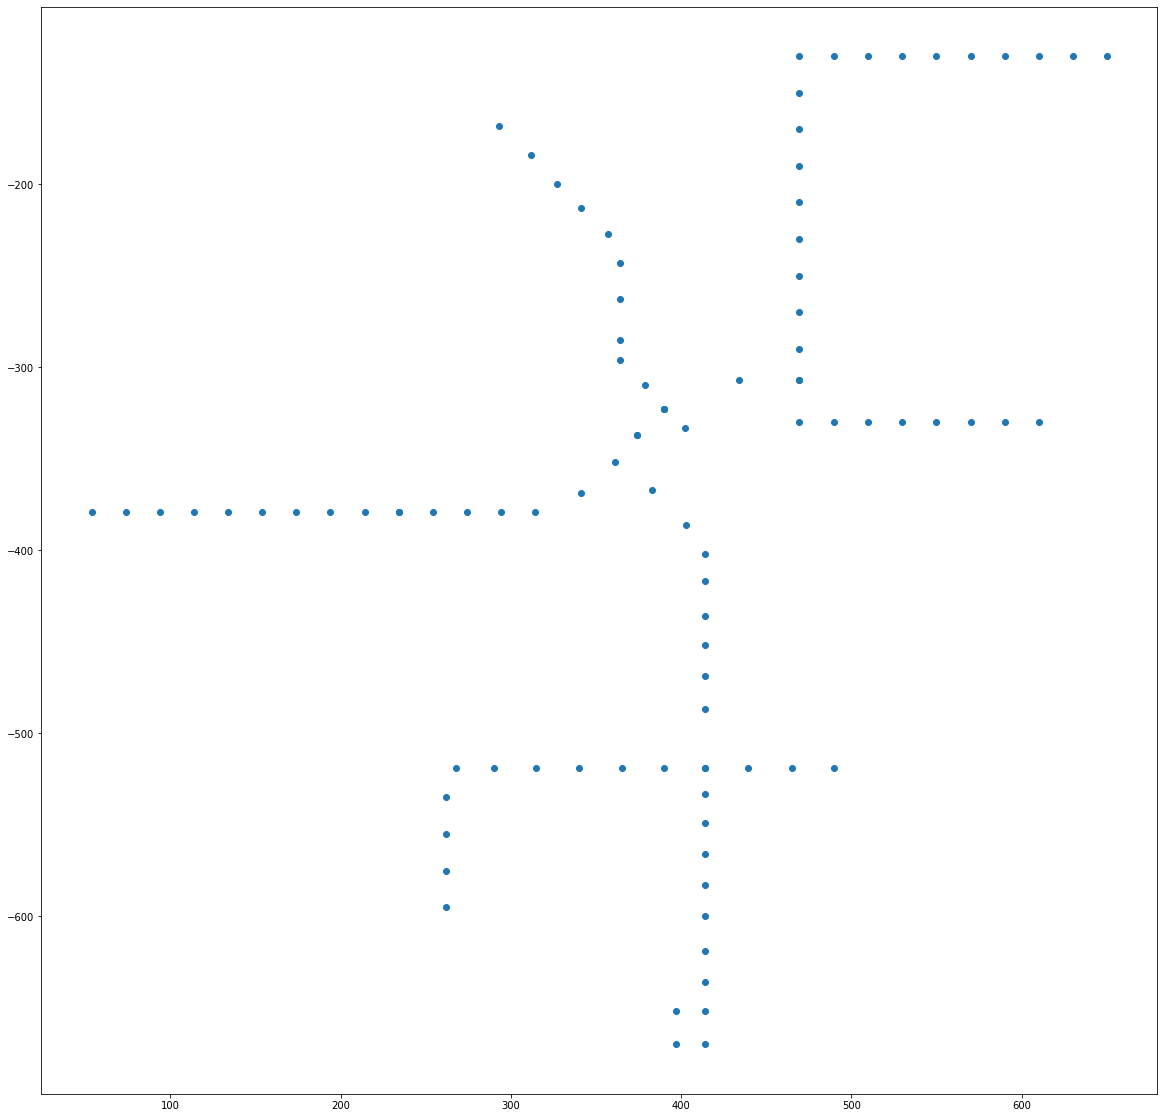

In [65]:
#metro red line
red = {
    "North Hollywood" : [100, 293, -168],
    "Universal City/Studio City" : [101, 312, -184],
    "Hollywood/Highland" : [102, 327, -200],
    "Hollywood/Vine" : [103, 341, -213],
    "Hollywood/Western" : [104, 357, -227],
    "Vermont/Snset" : [105, 364, -243],
    "Vermont/Santa Monica" : [106, 364, -263],
    "Vermont/Beverly" : [107, 364, -285],
    "Wilshire/Vermont" : [108, 364, -296],
    "Westlake/Macarthur Park" : [109, 379, -310],
    "7th St/Metro Center" : [110, 390, -323],
    "Pershing Square" : [111, 402, -333],
    "Civic Ctr/Grand Park" : [112, 434, -307],
    "Uion Station" : [113, 469, -307]
}

posX=[]
posY=[]
for i, name in enumerate(red):
    posX.append(red[name][1])
    posY.append(red[name][2])

#metro blue line
blue = {
    "7th St/Metro Center" : [200, 390, -323],
    "Pico" : [201, 374, -337],
    "Grand/Lattc" : [202, 383, -367],
    "San Pedro St" : [203, 403, -386],
    "Washington" : [204, 414, -402],
    "Vernon" : [205, 414, -417],
    "Slauson" : [206, 414, -436],
    "Florence" : [207, 414, -452],
    "Firestone" : [208, 414, -469],
    "103rd St/Watts Towers" : [209, 414, -487],
    "Willowbrook/Rosa Parks" : [210, 414, -519],
    "Compton" : [211, 414, -533],
    "Artesia" : [212, 414, -549],
    "Del Amo" : [213, 414, -566],
    "Wardlow" : [214, 414, -583],
    "Willow St" : [215, 414, -600],
    "Pacific Coast Hwy" : [216, 414, -619],
    "Anaheim St" : [217, 414, -636],
    "5th St" : [218, 414, -652],
    "1st St" : [219, 414, -670],
    "Downtown Long Beach" : [220, 397, -670],
    "Pacific Av" : [221, 397, -652],
    "Anaheim St" : [217, 414, -636]
}

for i, name in enumerate(blue):
    posX.append(blue[name][1])
    posY.append(blue[name][2])


#metro Expo line
expo = {
    "7th St/Metro Center" : [300, 390, -323],
    "Pico" : [301, 374, -337],
    "LATTC/Ortho Institute" : [302, 361, -352],
    "Jefferson/USC" : [303, 341, -369],
    "Expo Park/USC" : [304, 314, -379],
    "Expo/Vermont" : [305, 294, -379],
    "Expo/Western" : [306, 274, -379],
    "Expo/Crenshaw" : [307, 254, -379],
    "Farmdale" : [308, 234, -379],
    "Expo/La Brea" : [309, 234, -379],
    "La Cienega/Jefferson" : [310, 214, -379],
    "Culver City" : [311, 194, -379],
    "Palms" : [312, 174, -379],
    "Westwood/Rancho" : [313, 154, -379],
    "Expo/Sepulveda" : [314, 134, -379],
    "Expo/Bundy" : [315, 114, -379],
    "26th St/Bergamot" : [316, 94, -379],
    "17th St/SMC" : [317, 74, -379],
    "Downtown Santa Monica" : [318, 54, -379]
}

for i, name in enumerate(expo):
    posX.append(expo[name][1])
    posY.append(expo[name][2])

#metro Green line
green = {
    "Norwalk" : [400, 490, -519],
    "Lakewood Bl" : [401, 465, -519],
    "Long Beach Bl" : [402, 439, -519],
    "Willowbrook/Rosa Parks" : [403, 414, -519],###
    "Avalon" : [404, 390, -519],
    "Harbor Freeway" : [405, 365, -519],
    "Vermont/Athens" : [406, 340, -519],
    "Crenshaw" : [407, 315, -519],
    "Hawthorne/Lennox" : [408, 290, -519],
    "Aviation/LAX" : [409, 268, -519],
    "Mariposa" : [410, 262, -535],####
    "El Segundo" : [411, 262, -555],
    "Douglas" : [412, 262, -575],
    "Redondo Beach" : [413, 262, -595]
}

for i, name in enumerate(green):
    posX.append(green[name][1])
    posY.append(green[name][2])


#metro Gold line
gold = {
    "APU/Citrus" : [500, 650, -130],
    "Azusa Downtown" : [501, 630, -130],
    "Irwindale" : [502, 610, -130],
    "Duarte/City of Hope" : [503, 590, -130],
    "Monrovia" : [504, 570, -130],
    "Arcadia" : [505, 550, -130],
    "Sierra Madre Villa" : [506, 530, -130],
    "Allen" : [507, 510, -130],
    "Lake Avenue" : [508, 490, -130],
    "Memorial Park" : [509, 469, -130],
    "Del Mar" : [510, 469, -150],
    "Fillmore" : [511, 469, -170],
    "South Pasadena" : [512, 469, -190],
    "Highland Park" : [513, 469, -210],
    "Southwest Museum" : [514, 469, -230],
    "Heritage Square" : [515, 469, -250],
    "Lincoln/Cypress" : [516, 469, -270],
    "Chinatown" : [517, 469, -290],
    "Union Station" : [518, 469, -307],
    "Little Tokyo/Arts District" : [519, 469, -330],
    "Pico/Aliso" : [520, 490, -330],
    "Mariachi Plaza" : [521, 510, -330],
    "Soto" : [522, 530, -330],
    "Indiana" : [523, 550, -330],
    "Maravilla" : [524, 570, -330],
    "East LA Civic Center" : [525, 590, -330],
    "Atlantic" : [526, 610, -330]
}


for i, name in enumerate(gold):
    posX.append(gold[name][1])
    posY.append(gold[name][2])

plt.figure(figsize=(20,20))
plt.scatter(posX, posY)
plt.show()

출발 구역 부터 도착 구역을 입력 받고 최소 경로를 구해서(환승역 포함) 구간별 위험도를 다 더해서 나타낸다.

출발점과 도착점을 라인으로 잇는다.
앞자리 숫자를 비교해서 다르면 환승역을 찾아서 

In [66]:
#가중치 추가
graph = {
    #red line
    'North Hollywood': {'Universal City/Studio City': 1},
    'Universal City/Studio City': {'North Hollywood': 1, 'Hollywood/Highland': 1},
    'Hollywood/Highland': {'Universal City/Studio City': 1, 'Hollywood/Vine': 1},
    'Hollywood/Vine': {'Hollywood/Highland': 1, 'Hollywood/Western': 1},
    'Hollywood/Western': {'Hollywood/Vine': 1, 'Vermont/Snset':1},
    'Vermont/Snset': {'Hollywood/Western': 1, 'Vermont/Santa Monica': 1},
    'Vermont/Santa Monica': {'Vermont/Snset': 1, 'Vermont/Beverly': 1},
    'Vermont/Beverly': {'Vermont/Santa Monica': 1, 'Wilshire/Vermont': 1},
    'Wilshire/Vermont': {'Vermont/Beverly': 1, 'Westlake/Macarthur Park': 1},
    'Westlake/Macarthur Park': {'Wilshire/Vermont': 1, '7th St/Metro Center': 1},
    '7th St/Metro Center': {'Westlake/Macarthur Park': 1, 'Pershing Square': 1, 'Pico': 1}, ##환승역
    'Pershing Square': {'7th St/Metro Center': 1, 'Civic Ctr/Grand Park': 1},
    'Civic Ctr/Grand Park': {'Pershing Square': 1, 'Uion Station': 1},
    'Uion Station': {'Civic Ctr/Grand Park': 1, 'Little Tokyo/Arts District': 1, 'Chinatown':1}, ##환승역

    #blue line
    'Pico': {'7th St/Metro Center': 1, 'Grand/Lattc': 1, 'LATTC/Ortho Institute': 1},
    'Grand/Lattc': {'Pico': 1, 'San Pedro St': 1},
    'San Pedro St': {'Grand/Lattc': 1, 'Washington': 1},
    'Washington': {'San Pedro St': 1, 'Vernon': 1},
    'Vernon': {'Washington': 1, 'Slauson': 1},
    'Slauson': {'Vernon': 1, 'Florence': 1},
    'Florence': {'Slauson': 1, 'Firestone': 1},
    'Firestone': {'Florence': 1, '103rd St/Watts Towers': 1},
    '103rd St/Watts Towers': {'Firestone': 1, 'Willowbrook/Rosa Parks': 1},
    'Willowbrook/Rosa Parks': {'103rd St/Watts Towers': 1, 'Compton': 1, 'Avalon': 1, 'Long Beach Bl': 1}, ##환승역
    'Compton': {'Willowbrook/Rosa Parks': 1, 'Artesia': 1},
    'Artesia': {'Compton': 1, 'Del Amo': 1},
    'Del Amo': {'Artesia': 1, 'Wardlow': 1},
    'Wardlow': {'Del Amo': 1, 'Willow St': 1},
    'Willow St': {'Wardlow': 1, 'Pacific Coast Hw': 1},
    'Pacific Coast Hwy': {'Willow St': 1, 'Anaheim St': 1},
    'Anaheim St': {'5th St': 1},
    '5th St': {'1st St': 1},
    '1st St': {'Downtown Long Beach': 1},
    'Downtown Long Beach': {'Pacific Av': 1},
    'Pacific Av': {'Anaheim St': 1},

    #Expo line
    'LATTC/Ortho Institute': {'7th St/Metro Center': 1, 'Jefferson/USC': 1},
    'Jefferson/USC': {'LATTC/Ortho Institute': 1, 'Expo Park/USC': 1},
    'Expo Park/USC': {'Jefferson/USC': 1, 'Expo/Vermont': 1},
    'Expo/Vermont': {'Expo Park/USC': 1, 'Expo/Western': 1},
    'Expo/Western': {'Expo/Vermont': 1, 'Expo/Crenshaw': 1},
    'Expo/Crenshaw': {'Expo/Western': 1, 'Farmdale': 1},
    'Farmdale': {'Expo/Crenshaw': 1, 'Expo/La Brea': 1},
    'Expo/La Brea': {'Farmdale': 1, 'La Cienega/Jefferson': 1},
    'La Cienega/Jefferson': {'Expo/La Brea': 1, 'Culver City': 1},
    'Culver City': {'La Cienega/Jefferson': 1, 'Palms': 1},
    'Palms': {'Culver City': 1, 'Westwood/Rancho': 1},
    'Westwood/Rancho': {'Palms': 1, 'Expo/Sepulveda': 1},
    'Expo/Sepulveda': {'Westwood/Rancho': 1, 'Expo/Bundy': 1},
    'Expo/Bundy': {'Expo/Sepulveda': 1, '26th St/Bergamot': 1},  
    '26th St/Bergamot': {'Expo/Bundy': 1, '17th St/SMC': 1},
    '17th St/SMC': {'26th St/Bergamot': 1, 'Downtown Santa Monica': 1}, 
    'Downtown Santa Monica': {'17th St/SMC': 1},

    #Green line
    'Norwalk': {'Lakewood Bl': 1},  
    'Lakewood Bl': {'Norwalk': 1, 'Long Beach Bl': 1},
    'Long Beach Bl': {'Lakewood Bl': 1, 'Willowbrook/Rosa Parks': 1},
    'Avalon': {'Willowbrook/Rosa Parks': 1, 'Harbor Freeway': 1},
    'Harbor Freeway': {'Avalon': 1, 'Vermont/Athens': 1},  
    'Vermont/Athens': {'Harbor Freeway': 1, 'Crenshaw': 1},
    'Crenshaw': {'Vermont/Athens': 1, 'Hawthorne/Lennox': 1},  
    'Hawthorne/Lennox': {'Crenshaw': 1, 'Aviation/LAX': 1},
    'Aviation/LAX': {'Hawthorne/Lennox': 1, 'Mariposa': 1},
    'Mariposa': {'Aviation/LAX': 1, 'El Segundo': 1},
    'El Segundo': {'Mariposa': 1, 'Douglas': 1},  
    'Douglas': {'El Segundo': 1, 'Redondo Beach': 1},
    'Redondo Beach': {'Douglas': 1},

    #Gold line
    'APU/Citrus': {'Azusa Downtown': 1},
    'Azusa Downtown': {'APU/Citrus': 1, 'Irwindale': 1},
    'Irwindale': {'Azusa Downtown': 1, 'Duarte/City of Hope': 1},
    'Duarte/City of Hope': {'Irwindale': 1, 'Monrovia': 1},  
    'Monrovia': {'Duarte/City of Hope': 1, 'Arcadia': 1},
    'Arcadia': {'Monrovia': 1, 'Sierra Madre Villa': 1},
    'Sierra Madre Villa': {'Arcadia': 1, 'Allen': 1},
    'Allen': {'Sierra Madre Villa': 1, 'Lake Avenue': 1},
    'Lake Avenue': {'Allen': 1, 'Memorial Park': 1},
    'Memorial Park': {'Lake Avenue': 1, 'Del Mar': 1},  
    'Del Mar': {'Memorial Park': 1, 'Fillmore': 1},
    'Fillmore': {'Del Mar': 1, 'South Pasadena': 1},
    'South Pasadena': {'Fillmore': 1, 'Highland Park': 1},
    'Highland Park': {'South Pasadena': 1, 'Southwest Museum': 1},
    'Southwest Museum': {'Highland Park': 1, 'Heritage Square': 1},
    'Heritage Square': {'Southwest Museum': 1, 'Lincoln/Cypress': 1},  
    'Lincoln/Cypress': {'Heritage Square': 1, 'Chinatown': 1},
    'Chinatown': {'Lincoln/Cypress': 1, 'Uion Station': 1},
    'Little Tokyo/Arts District': {'Uion Station': 1, 'Pico/Aliso': 1},
    'Pico/Aliso': {'Little Tokyo/Arts District': 1, 'Mariachi Plaza': 1},
    'Mariachi Plaza': {'Pico/Aliso': 1, 'Soto': 1},
    'Soto': {'Mariachi Plaza': 1, 'Indiana': 1},  
    'Indiana': {'Soto': 1, 'Maravilla': 1},
    'Maravilla': {'Indiana': 1, 'East LA Civic Center': 1},
    'East LA Civic Center': {'Maravilla': 1, 'Atlantic': 1},
    'Atlantic': {'East LA Civic Center': 1}
}

In [86]:
#다익스트라 알고리즘
import heapq
import sys

startingPoint = "Allen"#input("\nEnter Start Location") #출발지점
endPoint = "Soto"#input("\nEnter End Location") #도착지점

def dijkstra(graph, start):
  distances = {node: float('inf') for node in graph}  # start로 부터의 거리 값을 저장하기 위함
  distances[start] = 0  # 시작 값은 0이어야 함
  queue = []
  heapq.heappush(queue, [distances[start], start])  # 시작 노드부터 탐색 시작 하기 위함.

  while queue:  # queue에 남아 있는 노드가 없으면 끝
    current_distance, current_destination = heapq.heappop(queue)  # 탐색 할 노드, 거리를 가져옴.

    if distances[current_destination] < current_distance:  # 기존에 있는 거리보다 길다면, 볼 필요도 없음
      continue
    
    for new_destination, new_distance in graph[current_destination].items():
      distance = current_distance + new_distance  # 해당 노드를 거쳐 갈 때 거리
      if distance < distances[new_destination]:  # 알고 있는 거리 보다 작으면 갱신
        distances[new_destination] = distance
        heapq.heappush(queue, [distance, new_destination])  # 다음 인접 거리를 계산 하기 위해 큐에 삽입
    
  return distances


In [91]:
print(dijkstra(graph, 'Arcadia'))

KeyError: 'Arcadia'

In [84]:
allLines = {
    #red line
    "North Hollywood" : [100, 293, -168],
    "Universal City/Studio City" : [101, 312, -184],
    "Hollywood/Highland" : [102, 327, -200],
    "Hollywood/Vine" : [103, 341, -213],
    "Hollywood/Western" : [104, 357, -227],
    "Vermont/Snset" : [105, 364, -243],
    "Vermont/Santa Monica" : [106, 364, -263],
    "Vermont/Beverly" : [107, 364, -285],
    "Wilshire/Vermont" : [108, 364, -296],
    "Westlake/Macarthur Park" : [109, 379, -310],
    "7th St/Metro Center" : [110, 390, -323],
    "Pershing Square" : [111, 402, -333],
    "Civic Ctr/Grand Park" : [112, 434, -307],
    "Uion Station" : [113, 469, -307],

    #blue line
    "7th St/Metro Center" : [200, 390, -323],
    "Pico" : [201, 374, -337],
    "Grand/Lattc" : [202, 383, -367],
    "San Pedro St" : [203, 403, -386],
    "Washington" : [204, 414, -402],
    "Vernon" : [205, 414, -417],
    "Slauson" : [206, 414, -436],
    "Florence" : [207, 414, -452],
    "Firestone" : [208, 414, -469],
    "103rd St/Watts Towers" : [209, 414, -487],
    "Willowbrook/Rosa Parks" : [210, 414, -519],
    "Compton" : [211, 414, -533],
    "Artesia" : [212, 414, -549],
    "Del Amo" : [213, 414, -566],
    "Wardlow" : [214, 414, -583],
    "Willow St" : [215, 414, -600],
    "Pacific Coast Hwy" : [216, 414, -619],
    "Anaheim St" : [217, 414, -636],
    "5th St" : [218, 414, -652],
    "1st St" : [219, 414, -670],
    "Downtown Long Beach" : [220, 397, -670],
    "Pacific Av" : [221, 397, -652],
    "Anaheim St" : [217, 414, -636],

    #Expo line
    "7th St/Metro Center" : [300, 390, -323],
    "Pico" : [301, 374, -337],
    "LATTC/Ortho Institute" : [302, 361, -352],
    "Jefferson/USC" : [303, 341, -369],
    "Expo Park/USC" : [304, 314, -379],
    "Expo/Vermont" : [305, 294, -379],
    "Expo/Western" : [306, 274, -379],
    "Expo/Crenshaw" : [307, 254, -379],
    "Farmdale" : [308, 234, -379],
    "Expo/La Brea" : [309, 234, -379],
    "La Cienega/Jefferson" : [310, 214, -379],
    "Culver City" : [311, 194, -379],
    "Palms" : [312, 174, -379],
    "Westwood/Rancho" : [313, 154, -379],
    "Expo/Sepulveda" : [314, 134, -379],
    "Expo/Bundy" : [315, 114, -379],
    "26th St/Bergamot" : [316, 94, -379],
    "17th St/SMC" : [317, 74, -379],
    "Downtown Santa Monica" : [318, 54, -379],

    #Green line
    "Norwalk" : [400, 490, -519],
    "Lakewood Bl" : [401, 465, -519],
    "Long Beach Bl" : [402, 439, -519],
    "Willowbrook/Rosa Parks" : [403, 414, -519],###
    "Avalon" : [404, 390, -519],
    "Harbor Freeway" : [405, 365, -519],
    "Vermont/Athens" : [406, 340, -519],
    "Crenshaw" : [407, 315, -519],
    "Hawthorne/Lennox" : [408, 290, -519],
    "Aviation/LAX" : [409, 268, -519],
    "Mariposa" : [410, 262, -535],####
    "El Segundo" : [411, 262, -555],
    "Douglas" : [412, 262, -575],
    "Redondo Beach" : [413, 262, -595],

    #Gold line
    "APU/Citrus" : [500, 650, -130],
    "Azusa Downtown" : [501, 630, -130],
    "Irwindale" : [502, 610, -130],
    "Duarte/City of Hope" : [503, 590, -130],
    "Monrovia" : [504, 570, -130],
    "Arcadia" : [505, 550, -130],
    "Sierra Madre Villa" : [506, 530, -130],
    "Allen" : [507, 510, -130],
    "Lake Avenue" : [508, 490, -130],
    "Memorial Park" : [509, 469, -130],
    "Del Mar" : [510, 469, -150],
    "Fillmore" : [511, 469, -170],
    "South Pasadena" : [512, 469, -190],
    "Highland Park" : [513, 469, -210],
    "Southwest Museum" : [514, 469, -230],
    "Heritage Square" : [515, 469, -250],
    "Lincoln/Cypress" : [516, 469, -270],
    "Chinatown" : [517, 469, -290],
    "Union Station" : [518, 469, -307],
    "Little Tokyo/Arts District" : [519, 469, -330],
    "Pico/Aliso" : [520, 490, -330],
    "Mariachi Plaza" : [521, 510, -330],
    "Soto" : [522, 530, -330],
    "Indiana" : [523, 550, -330],
    "Maravilla" : [524, 570, -330],
    "East LA Civic Center" : [525, 590, -330],
    "Atlantic" : [526, 610, -330]
}
